In [134]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [135]:
# Constants Below
d = 1.293 # density of air 
cd = 0.9  # Coeficient Of Drag
pi = 3.14159 # Pie
# Variables 
wh = 0.5
wm = 0.030 # total weight 
w0 = 0.035
r = 0.22 # radius in terms of wingspan
r0 = 0.22
v = []
v2 = []
x1 = []
x2 = []
x3=[]

Corelation between increase in mass and velocity at steady state

In [136]:
while wh<=5:
  i = math.sqrt((2*wh)/(d*pi*(r*r)*cd))
  v.append(i)
  x1.append(wh)
  wh = wh+0.1

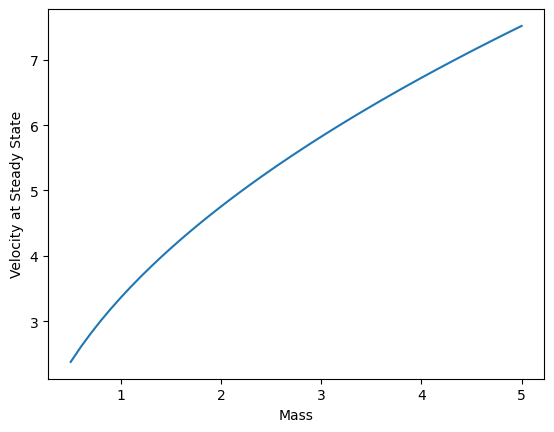

In [137]:
fig, ax = plt.subplots()
plt.xlabel("Mass")
plt.ylabel("Velocity at Steady State")
ax.plot(x1, v)
plt.show()

We have to account for increase in weight as the radius also increases. This is done by using the following relation:
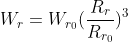



In [138]:
while r<=1:
  wr=w0*((r/r0)*(r/r0)*(r/r0))
  w=wm+wr
  i = math.sqrt((2*w)/(d*pi*(r*r)*cd))
  v2.append(i)
  x3.append(w)
  x2.append(r)
  r = r+0.01

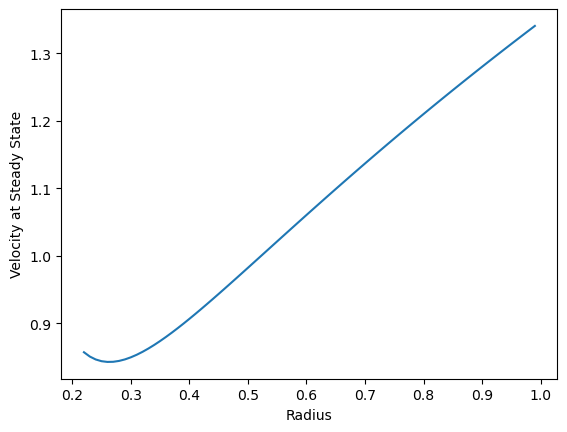

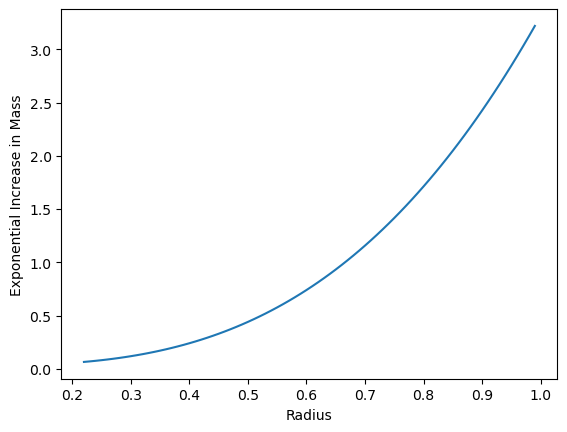

In [139]:
fig, ay = plt.subplots()
ay.plot(x2, v2)
plt.xlabel("Radius")
plt.ylabel("Velocity at Steady State")
plt.show()

fig, az = plt.subplots()
az.plot(x2, x3)
plt.xlabel("Radius")
plt.ylabel("Exponential Increase in Mass")
plt.show()

Vs Min = 0.8428013971409224
R Design = 0.26


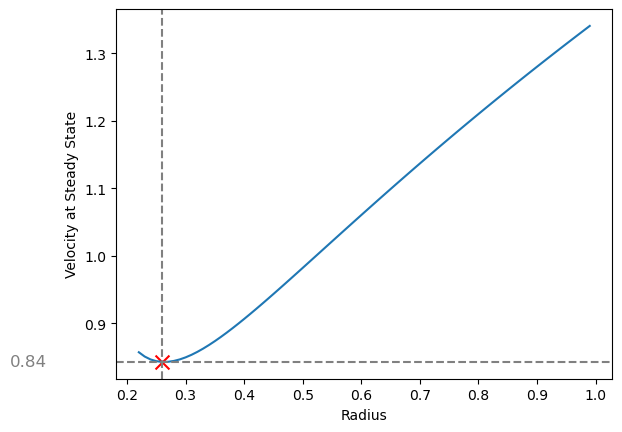

In [140]:
#Used to find the minimum value of Vs and its corresponding value of r for further calculation (Park's paper)
vmin = v2[0]
index = 0
for i, val in enumerate(v2):
    if val < vmin:
        vmin = val
        index = i
rd = x2[index]   
print("Vs Min =",vmin)
print("R Design =", rd)

fig, ay = plt.subplots()
ay.plot(x2, v2)
plt.scatter(rd, vmin, s=100, c='red', marker='x')
ay.axhline(y=vmin, color='gray', linestyle='--')
ay.axvline(x=rd, color='gray', linestyle='--')
ay.text(0, vmin, str(round(vmin,2)), color='gray', va='center', fontsize=12)
plt.xlabel("Radius")
plt.ylabel("Velocity at Steady State")

plt.show()

The following equation is used in Park's paper to find V(t) and d(t) $$c=\frac{\rho_{air}AC_{D}}{2m}$$

In [141]:
#finding c
c = (d*pi*(rd*rd)*cd)/2*w
print("c = ",round(c,3))

c =  0.398


Now using this we can make a graph of how V(t) changes with time  $$V(t)=V_{s}(1-e^{-ct})$$

In [142]:
t = 0 #time
time = []
vt = 0
vt1=[]
while t<=15:
    exp = math.exp((-1)*c*t)
    vt = vmin*(1-exp)
    time.append(t)
    vt1.append(vt)
    t=t+0.001

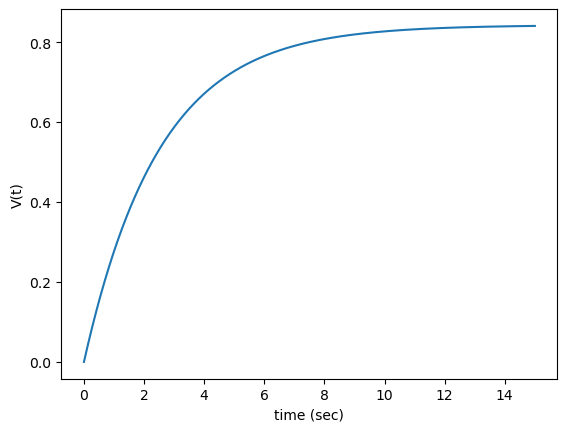

In [143]:
fig, vt = plt.subplots()
vt.plot(time, vt1)
plt.xlabel("time (sec)")
plt.ylabel("V(t)")
plt.show()

Fall Distance Equation $$d(t)=V_{s}(t+\frac{e^{-ct}}{c})-\frac{V_{s}}{c}$$

In [144]:
t=0
time2=[]
dt=0
dt1=[]
while t<=1:
    exp = math.exp((-1)*c*t)
    dt= (vmin*(t+(exp/c)))-(vmin/c)
    dt1.append(dt)
    time2.append(t)   
    t=t+0.01

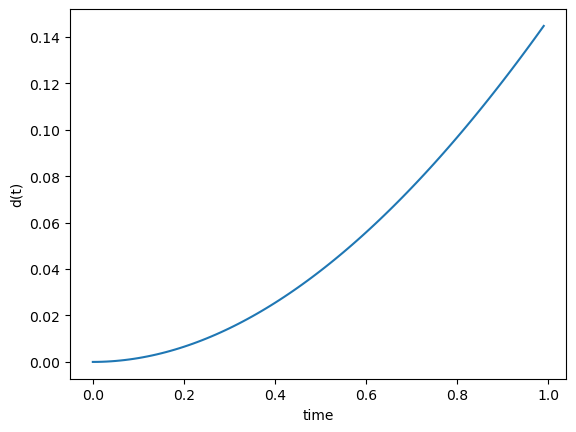

In [145]:
fig, vt = plt.subplots()
vt.plot(time2, dt1)
plt.xlabel("time")
plt.ylabel("d(t)")
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()